<a href="https://colab.research.google.com/github/SuhelAnsari9272/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px


c:\Users\Suhel Ansari\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Connect with google drive
#Reading the data
data = pd.read_csv('D:\git_project\Telecom-Churn-Analysis\Dataset.csv')

In [4]:
#Data overview
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [5]:
data.tail()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0
3332,0,74,1,1,3.70,0,234.4,113,100.0,13.30,13.7


In [6]:
#Shape
data.shape

(3333, 11)


#### Data Description

<b> Churn </b>: 1 if customer cancelled service, 0 if not (Target)  \
<b> AccountWeeks </b> : number of weeks customer has had active account  \
<b> ContractRenewal </b>: 1 if customer recently renewed contract, 0 if not  \
<b> DataPlan </b>: 1 if customer has data plan, 0 if not  \
<b> DataUsage </b>: gigabytes of monthly data usage  \
<b> CustServCalls </b>: number of calls into customer service  \
<b> DayMins </b> : average daytime minutes per month  \
<b> DayCalls </b> : average number of daytime calls  \
<b> MonthlyCharge </b> : average monthly bill  \
<b> OverageFee </b> : largest overage fee in last 12 months  \
<b> RoamMins </b>  : average number of roaming minutes  


In [7]:
#Columns
columns = data.columns

discrete_columns = ['Churn','ContractRenewal','DataPlan','CustServCalls']
continous_columns = [column for column in columns if column not in discrete_columns]


In [7]:
continous_columns

['AccountWeeks',
 'DataUsage',
 'DayMins',
 'DayCalls',
 'MonthlyCharge',
 'OverageFee',
 'RoamMins']

In [8]:
#Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [9]:
#Data description
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


* We have active account for 1 week  to 243 weeks.
* The monthly mean data usage is 0.82 GB.
* Maximum customer service call is of 9 times.
* Approx 180 mins is being called by customer in a month.
* On an average 100 Calls is made in a month.
* The monthly mean charge is of 56 units.
* The mean overage fee is of 10 units and Maximum is of 18 units.
* Mean roaming minutes in a months is 10 mins.

### Exploratory Data Analysis

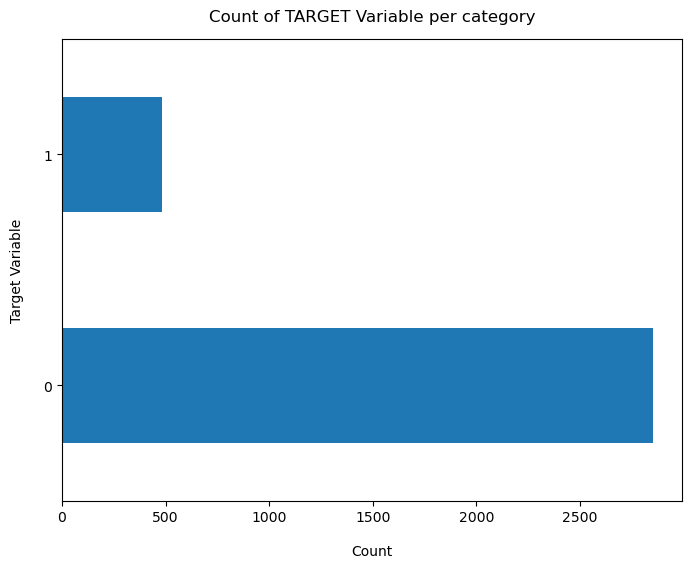

In [10]:
data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [11]:
#percentage of churn  or not
data['Churn'].value_counts() / len(data['Churn'])

0    0.855086
1    0.144914
Name: Churn, dtype: float64

* This clearly shows there is imbalance data with 15% churned customers

* Highly unbalanced data , as we have 86% of customers who have not churned and 14 % customers who have churned.

In [12]:
df = data.copy()

In [13]:
#Data Cleaning
#based on the domain knowledge we can excute the below code
#impure_data = df[(df['DataUsage'] > 0.0) & (df['DataPlan'] == 0)]
#df = df.drop(impure_data.index)

<Axes: xlabel='ContractRenewal', ylabel='count'>

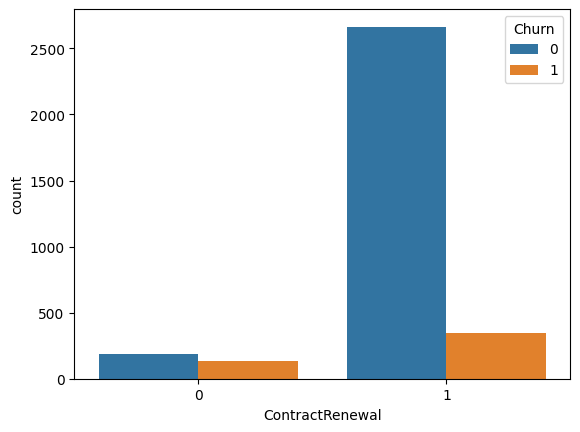

In [16]:
sns.countplot(data = df, x = df['ContractRenewal'], hue = 'Churn')

* The rate of churning is high for those customers who have not made Contract Renewal

In [24]:
sns.set()

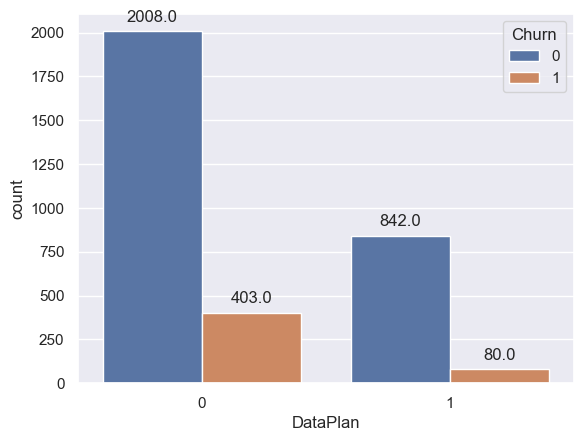

In [25]:
ax = sns.countplot(data=df, x='DataPlan', hue='Churn')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

* The churning rate is high for those customers who have not opted for DataPlan.

<Axes: xlabel='CustServCalls', ylabel='count'>

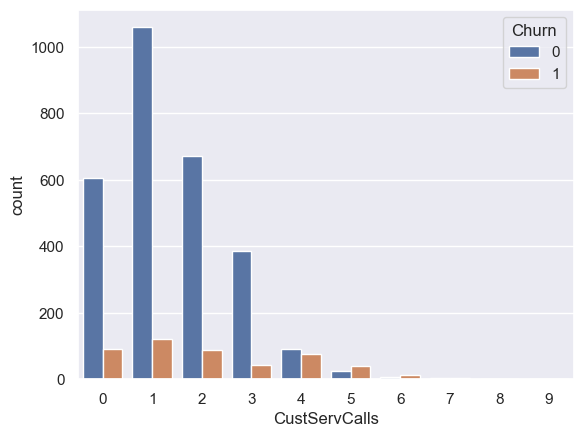

In [26]:
sns.countplot(data = df, x = df['CustServCalls'], hue = 'Churn')

* The churning rate is seems to increase for customer service calls increases

In [19]:
continous_columns

['AccountWeeks',
 'DataUsage',
 'DayMins',
 'DayCalls',
 'MonthlyCharge',
 'OverageFee',
 'RoamMins']

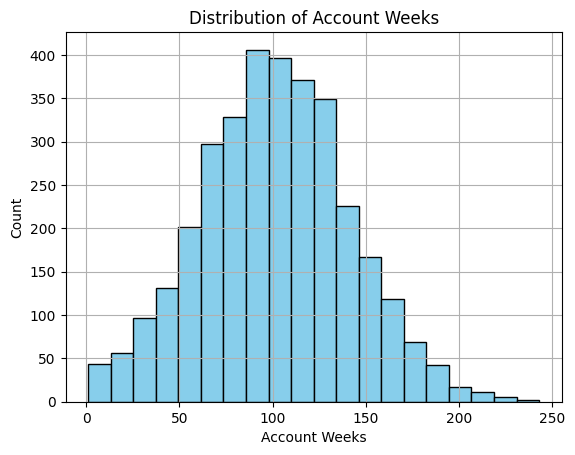

In [21]:
import matplotlib.pyplot as plt

# Plotting the distribution of AccountWeeks
plt.hist(df['AccountWeeks'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Account Weeks')
plt.ylabel('Count')
plt.title('Distribution of Account Weeks')
plt.grid(True)
plt.show()


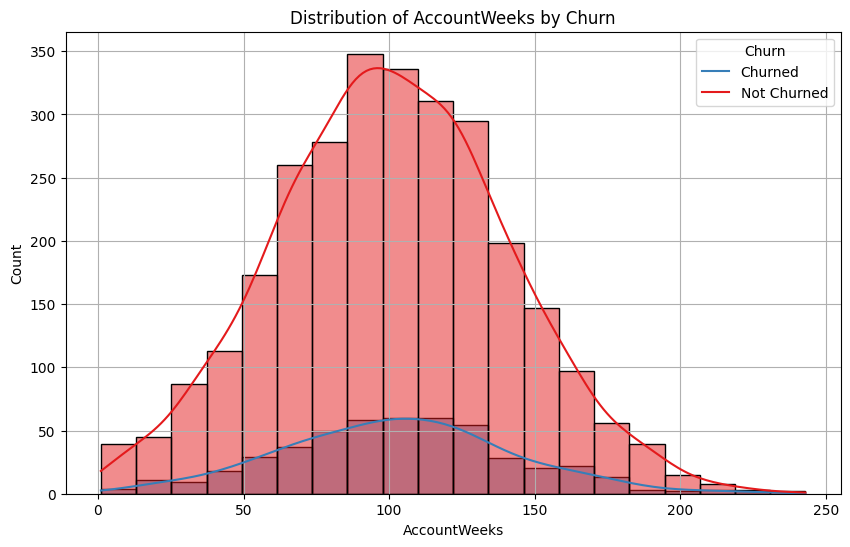

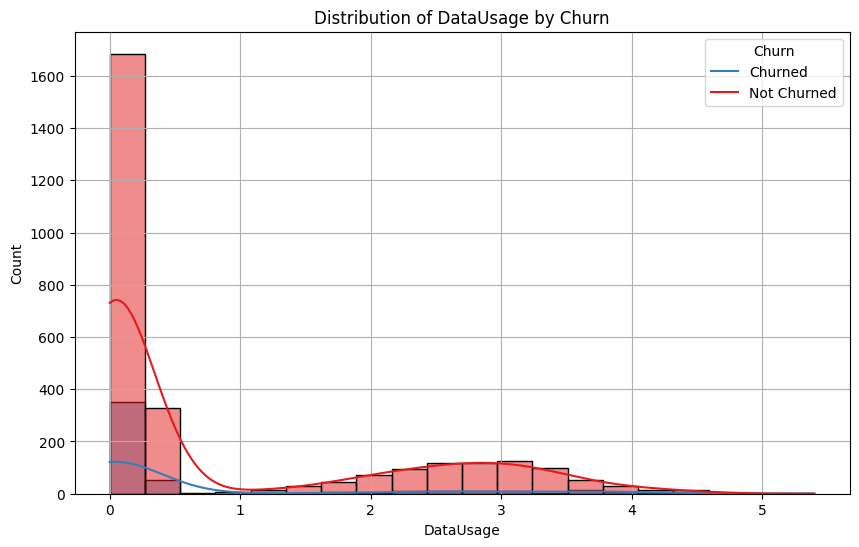

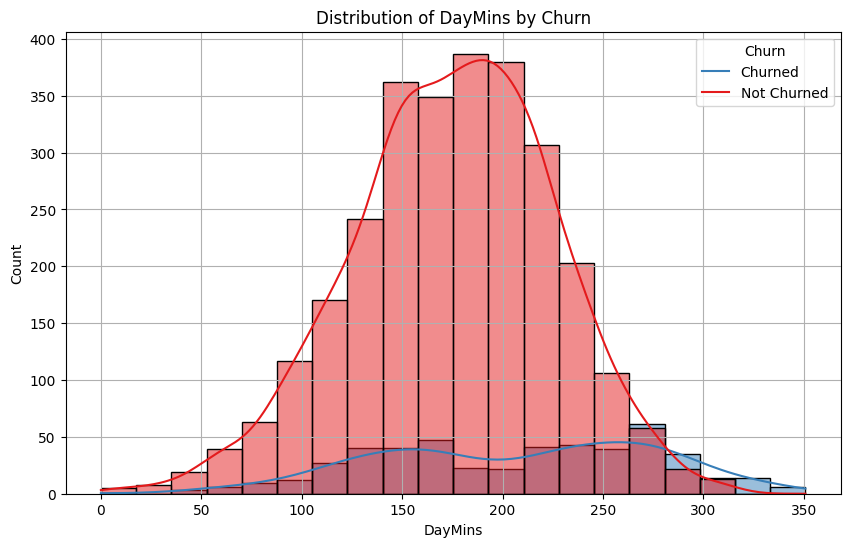

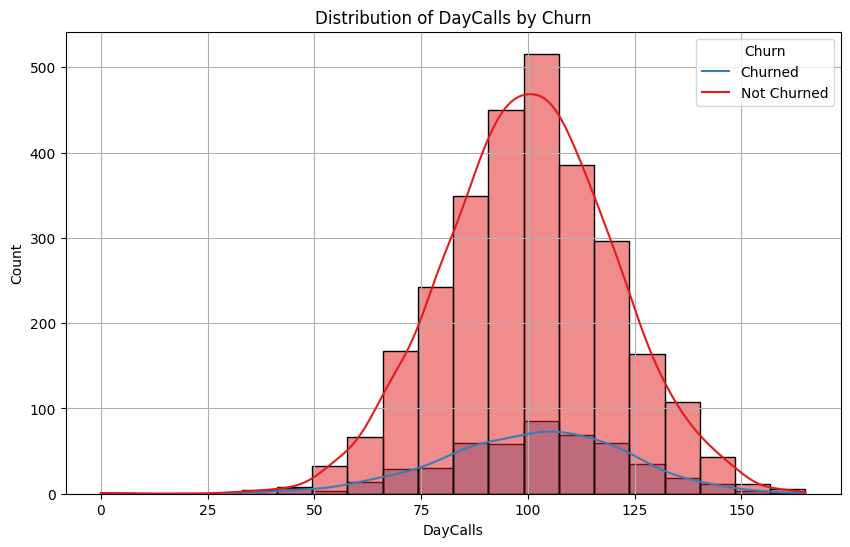

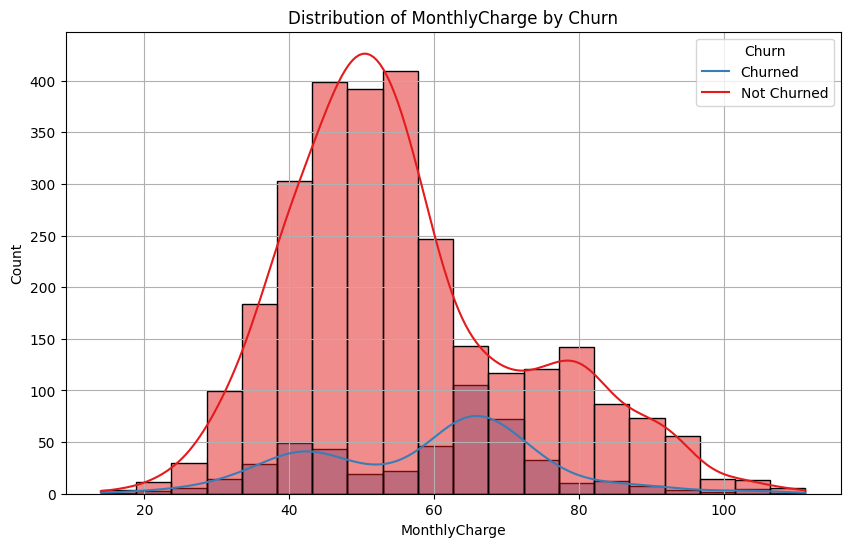

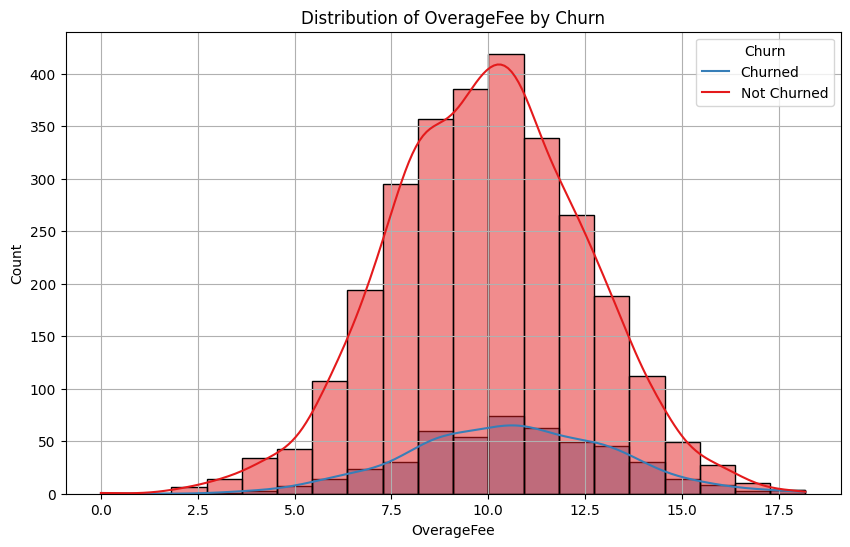

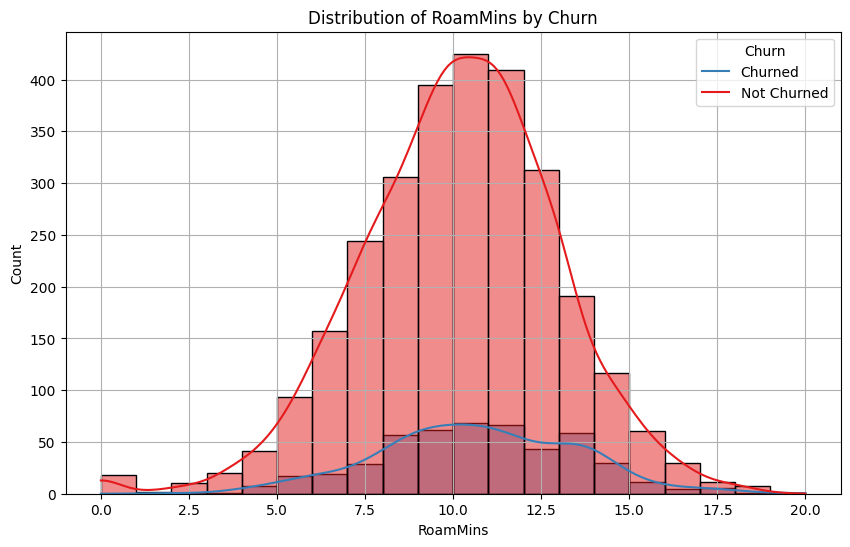

In [24]:
# Plotting the distribution of AccountWeeks with respect to Churn
for column in continous_columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(data=df, x= column , hue='Churn', bins=20, kde=True, palette='Set1', edgecolor='black')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.title(f'Distribution of {column} by Churn')
  plt.grid(True)
  plt.legend(title='Churn', labels=['Churned', 'Not Churned'])
  plt.show()

* The number of churn customers is high for those who use less data.
* The churned customers has the day time call mins higher.
* We can group the average weeks and the monthly charge column for better analysis.

In [27]:
df['AccountWeeksGroup'] = pd.cut(df['AccountWeeks'], bins=[0, 50, 100, 150, 200, 250], labels=['< 1yr', '1-2yrs', '2-3yrs', '3-4yr', '4+'])

<Axes: xlabel='AccountWeeksGroup', ylabel='count'>

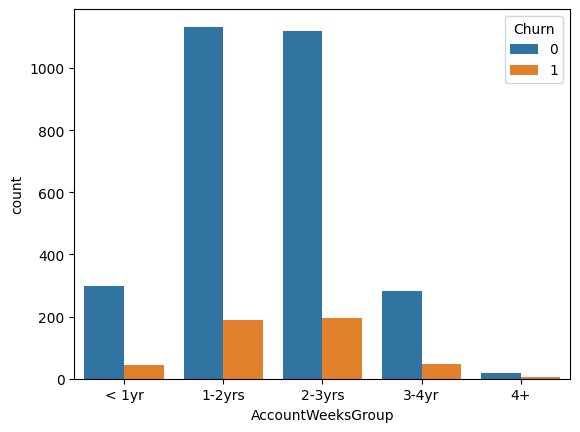

In [31]:
sns.countplot(data =df, x = 'AccountWeeksGroup', hue = 'Churn')

* The churn rate is high for those customer who has active account for 2-3 yrs.
* This clearly shows that there is some services issue due to customers are churning. we can see how different columns are associated with different time.

<Axes: xlabel='AccountWeeksGroup', ylabel='MonthlyCharge'>

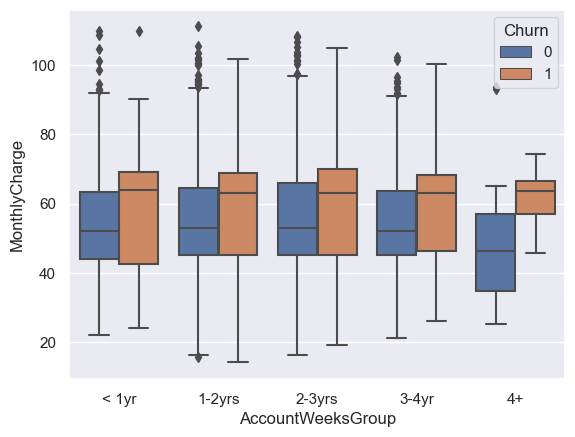

In [28]:
sns.boxplot(data =  df, x = 'AccountWeeksGroup', y = 'MonthlyCharge', hue = 'Churn')

* Churned customers were monthly charged same as non-churned customers.
* For long time users, the monthly charged is higher than non-churned customers.

<Axes: xlabel='AccountWeeksGroup', ylabel='DataUsage'>

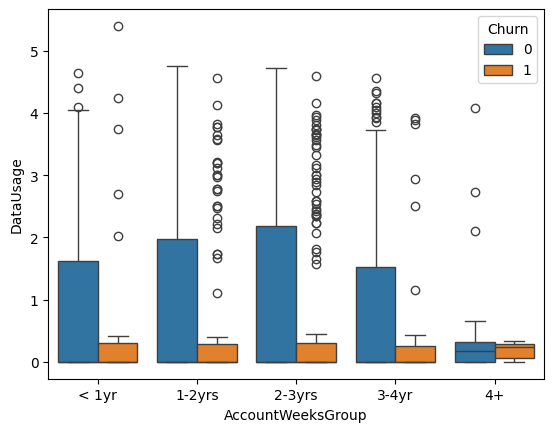

In [38]:
sns.boxplot(data =  df, x = 'AccountWeeksGroup', y = 'DataUsage', hue = 'Churn')

* The churned customers were not using the data services on large scale

<Axes: xlabel='AccountWeeksGroup', ylabel='DayCalls'>

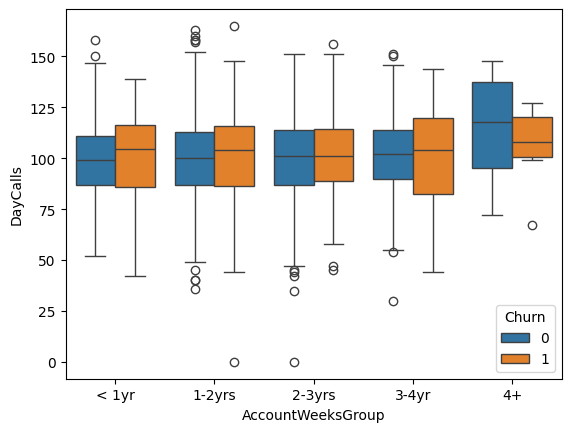

In [39]:
sns.boxplot(data =  df, x = 'AccountWeeksGroup', y = 'DayCalls', hue = 'Churn')

* Average number of day time calls is same for churned and non-churned customers.

<Axes: xlabel='AccountWeeksGroup', ylabel='DayMins'>

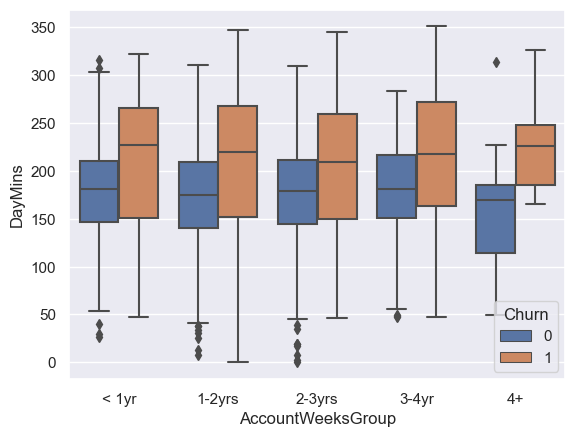

In [35]:
sns.boxplot(data =  df, x = 'AccountWeeksGroup', y = 'DayMins', hue = 'Churn')

* The averege day time minutes is high for churned customers.
* So long time callers users are more likely to churn

In [30]:
df['DayCalls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: DayCalls, dtype: float64

In [31]:
df['DayCallsGroup'] = pd.cut(df['DayCalls'], bins=[0, 50, 80, 110, 140, 250], labels=['< 50', '50-80', '80-110', '110-140', '140+'])

<Axes: xlabel='DayCallsGroup', ylabel='count'>

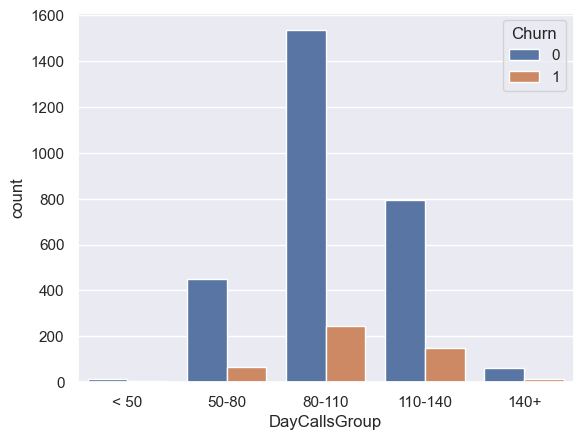

In [32]:
sns.countplot(data =df, x = 'DayCallsGroup', hue = 'Churn')

* Churning is high for  those customers who have average number of calls group around 100 in a month.

In [34]:
fig = px.box(df, x = 'DayCallsGroup', y = 'DayMins', color = 'Churn',)
fig.show()

* The customers who make long duration calls are churning.
* For higher Day Mins value we have high customer Churn.
* We can analyze this using the AccountWeeksGroup for better understanding.


In [37]:
fig = px.box(df, x = 'DayCallsGroup', y = 'MonthlyCharge', color = 'Churn')
fig.show()

* Customers who make more calls in a month have monthly charges is high for churning customers.

In [38]:
fig = px.box(df, x = 'DayCallsGroup', y = 'RoamMins', color = 'Churn')
fig.show()

* RoamMins do not seems to have a churning factor for customers with different Day Calls Group

In [40]:
fig = px.box(df, x = 'DayCallsGroup', y = 'OverageFee', color = 'Churn')
fig.show()

* Overage Fee is high for Customers with high number of calls are more likely to churn

In [36]:
continous_columns

['AccountWeeks',
 'DataUsage',
 'DayMins',
 'DayCalls',
 'MonthlyCharge',
 'OverageFee',
 'RoamMins']

In [46]:
df['DayMins'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: DayMins, dtype: float64

In [54]:
df['DayMinsGroup'] = pd.cut(df['DayMins'], bins=[0, 120, 240, 350], labels=['short', 'average','long'])

<Axes: xlabel='DayMinsGroup', ylabel='count'>

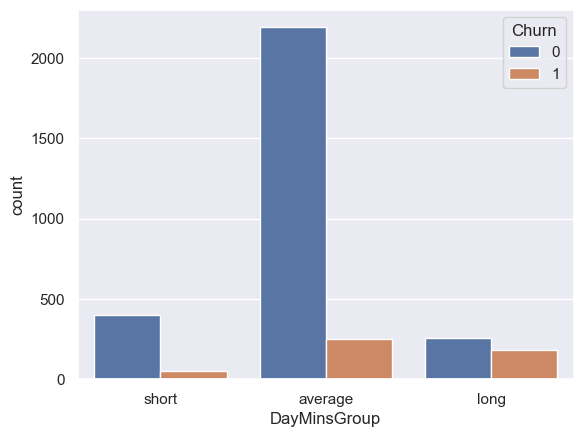

In [55]:
sns.countplot(data =df, x = 'DayMinsGroup', hue = 'Churn')

* Churning rate is high for those customers who makes long duration calls

In [56]:
continous_columns

['AccountWeeks',
 'DataUsage',
 'DayMins',
 'DayCalls',
 'MonthlyCharge',
 'OverageFee',
 'RoamMins']

In [57]:
fig = px.box(df, x = 'DayMinsGroup', y = 'MonthlyCharge', color = 'Churn')
fig.show()

* Monthly charge does not seems to be a significant factor for churning , as the Monthly charges are similiar or less for churning customers.

In [58]:
fig = px.box(df, x = 'DayMinsGroup', y = 'AccountWeeks', color = 'Churn')
fig.show()

* The long  duration is not a factor for churning of customers with respect to daymins call.

In [59]:
fig = px.box(df, x = 'DayMinsGroup', y = 'DataUsage', color = 'Churn')
fig.show()

* Data usage is less for churning customers , with respect to different monthly calls.